# GRIP ( Graduate Rotational Internship Program ) from The Sparks Foundation

## Author: Bishal Mohari

# 📈 Project Showcase: ***Prediction using Decision Tree Algorithm on the iris dataset***
***Aim of the project:*** The purpose of this project is to create a Decision Tree Classifier and visualize it graphically. Feeding any data into this classifier, the model should be able to predict the right class of the said element. 

# The Decision Tree Algorithm:
- Decision tree algorithm falls under the category of supervised learning. They can be used to solve both regression and classification problems.
- Decision tree uses the tree representation to solve the problem in which each leaf node corresponds to a class label and attributes are represented on the internal node of the tree.
- We can represent any boolean function on discrete attributes using the decision tree.

A decision tree works in a step wise manner where we have a tree structure where the nodes are split using a feature based on some criterion.
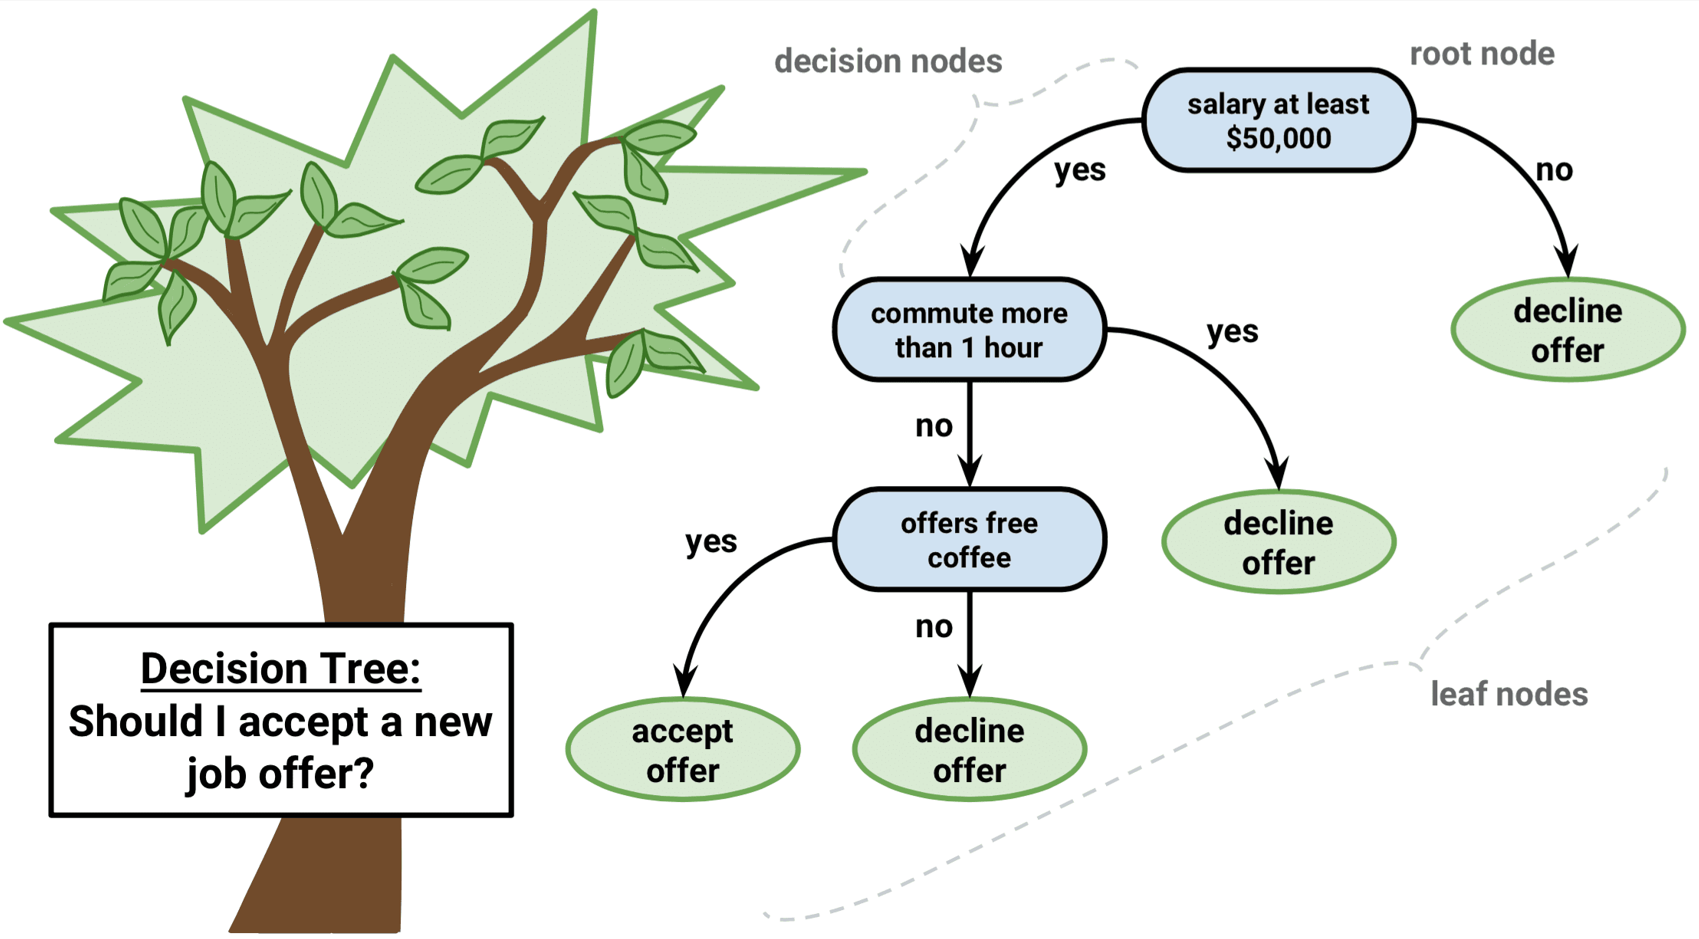
Let us look into the splitting criterias for how these features get selected. 

#### There are 2 main splitting criteria for decision tree classifiers:

1. ***Entropy***: Entropy is the measure of randomness in the system. So basically the lesser the entropy we get from a split the more information we gain from it, and the more the entropy the lesser information we gain from it. 

2. ***Gini Impurity***: In simple terms, this is the measure of impurity of a node. In more technical terms - A measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.
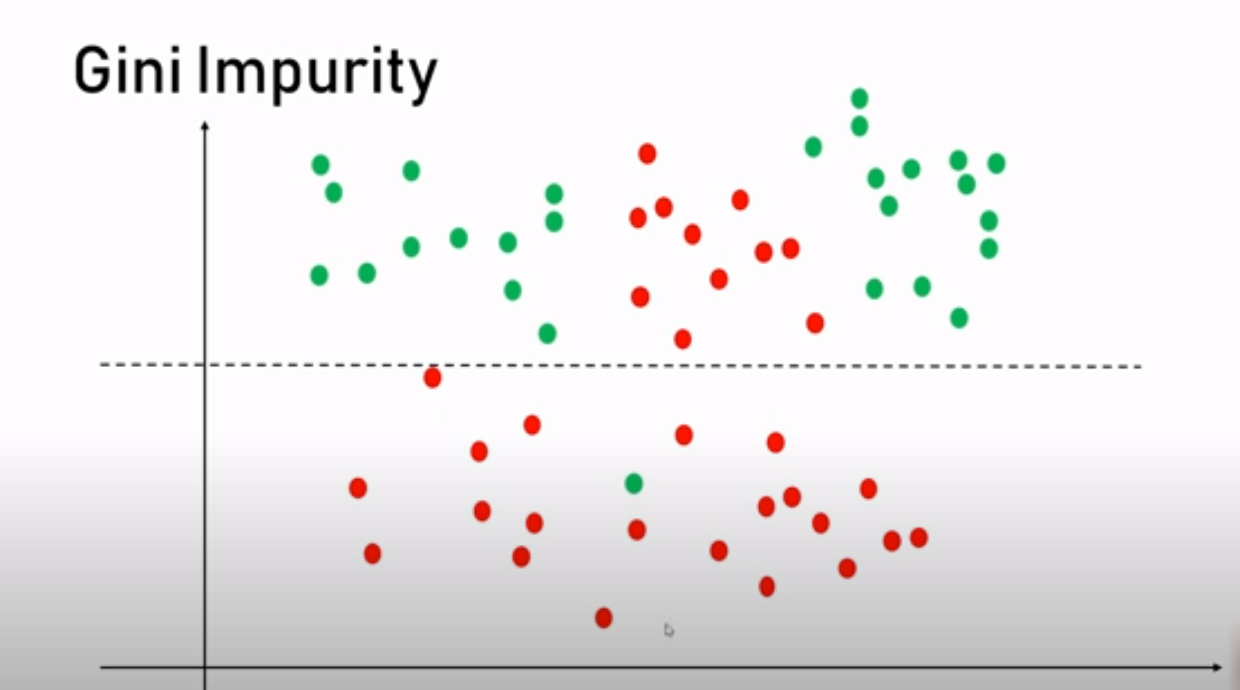
3. ***Information Gain***:Information gain is the reduction in entropy or surprise by transforming a dataset and is often used in training decision trees. Information gain is calculated by comparing the entropy of the dataset before and after a transformation.
#### The basic idea behind the algorithm:

1. We select the best attributes using the Attribute selection measures which are the above splitting criteria we have defined.
2. Make that attribute a decision node and break the dataset into smaller subsets.
3. Start tree building by repeating this process recusively for each child until there are no more remaining attributes.

In [1]:
# importing the libraries 
from sklearn.datasets import load_iris                             # We will be using the iris dataset for this project
from sklearn.tree import DecisionTreeClassifier, export_graphviz   # graphviz is used to visualize our decision tree classifier
from sklearn.model_selection import train_test_split
import sklearn.metrics as sm

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import pydot # is an interface to Graphviz
from IPython.display import Image

## Step 1 - Loading the Dataset

In [2]:
# Loading Dataset
iris = load_iris() 
X = iris.data[:,:]
y = iris.target

## Step 2 - Performing Exploratory Data Analysis

In [3]:
data = pd.DataFrame(iris['data'], columns=["Sepal length","Sepal Width","Petal Length","Petal Width"])
data['Species'] = iris['target']
data['Species'] = data['Species'].apply(lambda x: iris['target_names'][x])
data.head()

,Sepal length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.describe()

,Sepal length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.isnull().sum().sum()

0

In [7]:
data.duplicated().sum()

1

In [8]:
df = data.drop_duplicates()

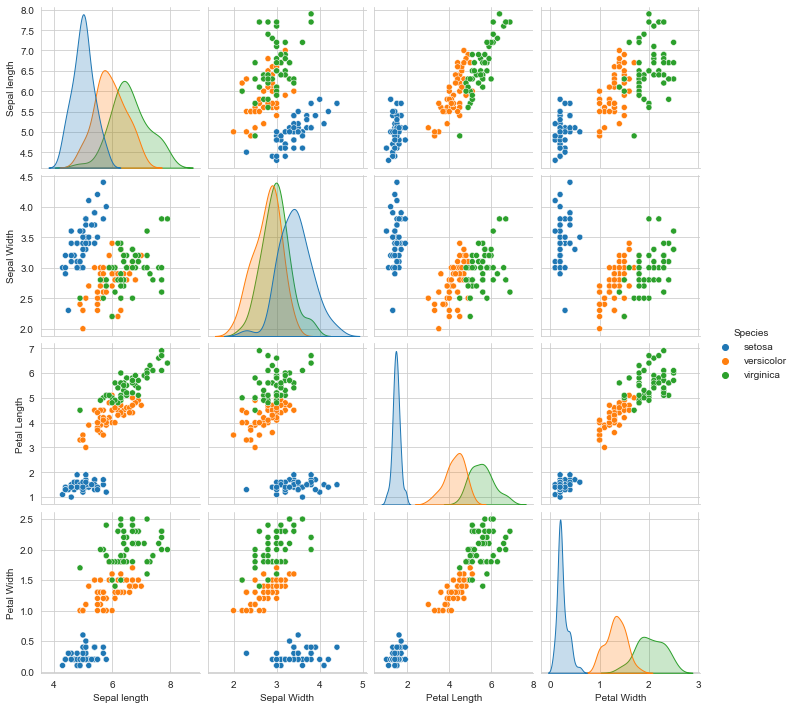

In [9]:
# Input data visualization
plt.close();
sns.set_style("whitegrid")
sns.pairplot(df, hue = "Species");
plt.show()


## Observations from the pairplot: 
1. Petal Length and Petal Width are the most useful features to identify various flower types.
2. While Setosa can be easily identified ( linearly Separable ), Virginica and Versicolor have some overlap (almost linearly separable)
3. We can find "lines" and "if-else" conditions to build a simple model to classify the flower types. 

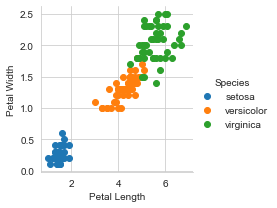

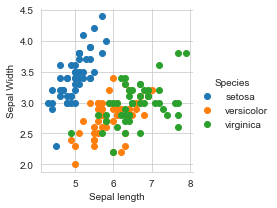

In [10]:
 # Scatter plot of data based on Sepal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Petal Length','Petal Width').add_legend()
plt.show()

# Scatter plot of data based on Petal Length and Width features
sns.FacetGrid(df,hue='Species').map(plt.scatter,'Sepal length','Sepal Width').add_legend()
plt.show()


## Step 3 - Decision Tree Model Training 

In [11]:
# Model Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(X_train,y_train)
print("Training Complete.")
y_pred = tree_classifier.predict(X_test)

Training Complete.


## Step 4 - Let us compare the actual and predicted flower classification 

In [12]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df1 

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,2,2
5,1,1
6,2,2
7,0,0
8,0,0
9,2,2


## Step 5: Model Visualization 

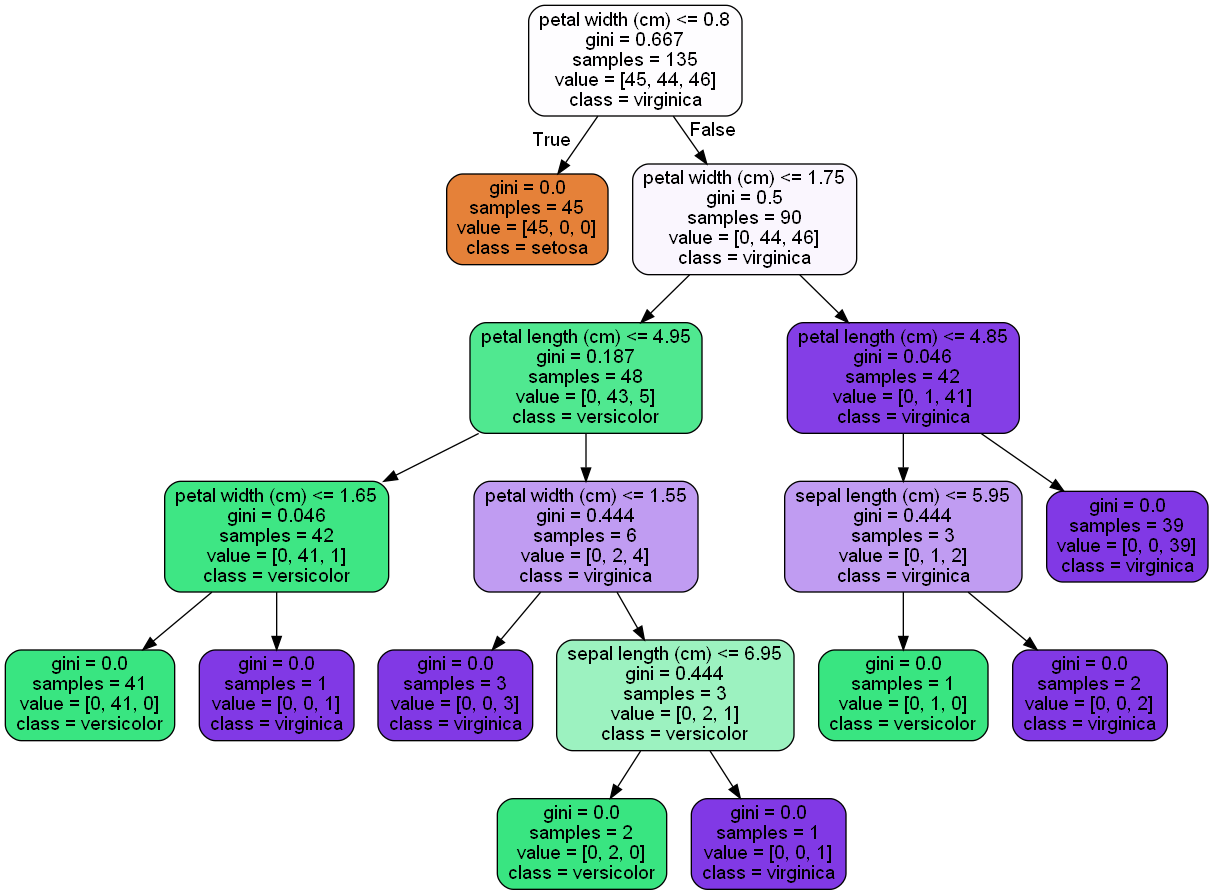

In [13]:
#Visualizing the trained Decision Tree Classifier taking all 4 features in consideration
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

export_graphviz(
        tree_classifier,
        out_file="img\desision_tree.dot",
        feature_names=iris.feature_names[:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
)
(graph,) = pydot.graph_from_dot_file('img\desision_tree.dot')
graph.write_png('img\desision_tree.png')
Image(filename='img\desision_tree.png') 

## Step 7 - We test our model for random variables

In [14]:
print("Class Names = ",iris.target_names)

# Estimating class probabilities
print()
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print()
print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print()
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']

Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 

Output =  [0]

Our model predicts the class as 0, that is, setosa.


## Step 8 - Calculating the Model accuracy 

In [15]:
print("ACCURACY: ", sm.accuracy_score(y_test, y_pred))

ACCURACY:  1.0


# Conclusion: 
So we have successfully managed to make a decision tree model that provides a 100% accuracy in classification between the different kinds of flowers. 